__Author__: Christian Camilo Urcuqui López

__Date__: 2 October 2018

This nootebook illustrate the basic theory from the references and illustrate their applications to make an artificial neural network with Python. In order to cover these ideas, the content is divided in the next sections:
+ [Perceptron](#Perceptron)
+ [Linear Perceptrons as Neurons](#Linear-Perceptrons-as-Neurons) 
+ Sigmoid, Tanh, and ReLU Neurons



# Perceptron

In order to understand how the biological brain works to desingn artificial intelligence, Warren McCulloch and Walter Pitts published the first concept of a simplified brain cell [2].

![image](../../Utilities/warren_piits.jpg)

```
McCulloch, W. S., & Pitts, W. (1943). A logical calculus of the ideas immanent in nervous activity. The bulletin of mathematical biophysics, 5(4), 115-133.
```
In their work they explained that a nerve cell can be represented as a simple logic gate with binary outputs; multiple signals arrive at the _dendrites_, are then integrated into the _cell body_, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will passed on by the _axon_.

![image](../../Utilities/perceptron_neuron.png)





Years ago, Frank Rosenblatt published the first concept of the perceptron at the age 1957 (Rosenblatt, F. (1958). The perceptron: a probabilistic model for information storage and organization in the brain. Psychological review, 65(6), 386.). 

From these ideas we can illustrate the representation of the biologic process in a mathematical process, the neuron gets its inputs along _dentrities_. Each of these incoming connections is dynamically strengthened or weakened based on how often it is used (the learn process that we have) and it's strength of each connection that detemrines the contribution of the input to the neuron's output. After this process, the inputs are summed together in the cell body. The sum is then transformed into a new signal that is propageted along the cell´s axon and sent off to other neurons. 

So, we can have the next inputs, outputs and a function:

$w = [w_{1}, w_{2}, ..., w_{n}]$ it is the vector of weights for our perceptron

$x = [x_{1}, w_{2}, ..., w_{n}]$ it is the vector of inputs 

$y = f(x \cdot w + b)$ we can represent the function and the neuron's output, b is the _bias_ term to produce the logit

# Linear Perceptrons as Neurons


In this notebook we will explore and make the functions of a perceptron solution, in order to prove it's capacities we will use the IRIS dataset for a classification problem. For the propose of this exercise we will only explore a __binary classification problem (we don't make a model to for One-vs-all (OvA) or One-vs-rest(OvR))__

In [10]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier
    
    Parameters
    -----------
    eta: float
        It is the learning rate (between 0.0 and 1.0) remember that it is better to have a lower value
    n_iter: int
        Passes over the training dataset
    
    Attributes
    -----------
    w_ :1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifications in every epoch
        
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the numbner of samples and  n_features is the number of features
        y: array-like, shape = [n_samples]
            Target values.
        
        Returns
        ----------
        self: object       
        
        """
        # the next code generates a vector of zeros
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        # the next lines is the learning process from the data
        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                # update the weigths according to the perceptron learning rule 
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        # it is useful to calculate the vector dot product 
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Vectorization

Is is an important concept in NumPy, it is useful to make arithmetic operations applied to all elements in an array. 


## Load the data

Pandas is a library to load the Iris dataset from a public repository into a DataFrame Object 

In [7]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data preprocessing and visualization

As I told, we will only explore a binary problem, so we will select the class labels that correspond to the 50 Iris-Setosa and 50 Iris-Versicolor flowers, and we will convert them in two interger class labels 1(Versicolor) and -1 (Setosa). Moreover, we will only extract the first feature columns (sepal length) and the third feature column (petal length) of those 100 traning samples. 

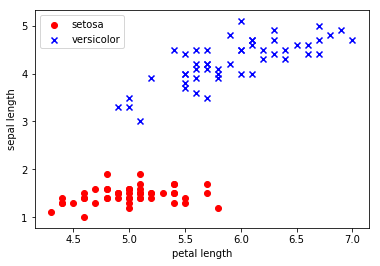

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# the next lines will filter the dataset
y = df.iloc[0:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[0:100, [0,2]].values

# the next lines will make the scatter plot 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

### Training phase 

It is time train our previous perceptron on the Iris Data that we downloaded. The next code will plot the misclassification error for each epoch to check if the algorithm converged and found a lmit that separates the two classes. 

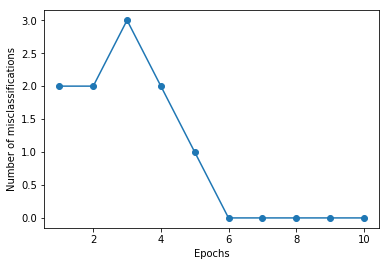

In [11]:
ppn = Perceptron (eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Number of misclassifications")
plt.show()


The previous graphic shows us that the perceptron converges in the epoch 6. The next code provides us a visualization mechanism to know the decision boundaries.

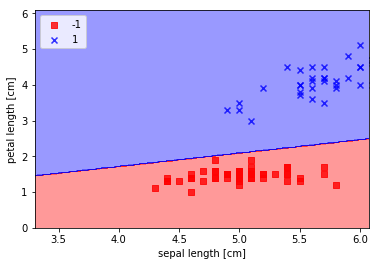

In [16]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map, I am goint to define a number of colors and markers via ListedColormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    # the next two lines define us the minimum and maximum values for the two features, so we will divide them in a pair of grids
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    # the next line allows us to flatten the grid arrays and create a matrix that has the same number of columns as the Iris 
    # training subset
    xx1, xx2 =  np.meshgrid(np.arange(x1_min, x2_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    # a countour plot maps the different decision regions to different colors for each predicted class in the grid array
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker= markers[idx], label=cl)
    
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()
    

    

According to Frank Rosenblatt, Perceptron is a good choice to revolve binary problems that are separated by a linear hyperplane (he proved this mathematically). However, if classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs. 

## References

+ Raschka, S. (2015). Python machine learning. Packt Publishing Ltd.
+ https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
+ Buduma, N., & Locascio, N. (2017). Fundamentals of deep learning: Designing next-generation machine intelligence algorithms. " O'Reilly Media, Inc.".
